In [24]:
#import the libraries to analyze the data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [23]:
#from the folder EQE/eqe - 1, read the excel file called DK-DH-1 using the library xlrd
#the excel file is read as a dataframe called df
#drop the lines 0 and 1
df = pd.read_excel('EQE\eqe - 1\DK-DH-1.xls', sheet_name='DK-DH-1', skiprows=[0,1])

#rename the column names with "wavelength" and "EQE"
df = df.rename(columns={'Wavelength (nm)':'wavelength', 'Bias = 0.00 V, Filter0, LED# N, J = 12.54 mA/cm^2':'EQE'})

In [9]:
col_name = list(df.columns)

col_name[0]

'wavelength'

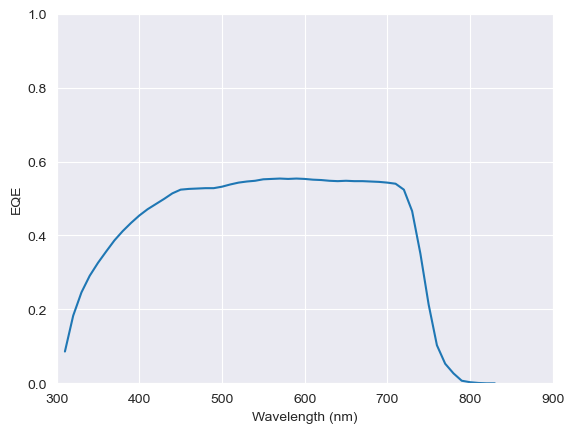

In [32]:
#plot the data
#plot the column 'Wavelength' as x and 'EQE' as y
#label the x and y axis
#show the plot
#use the library seaborn to plot the data
sns.set_style('darkgrid')
sns.lineplot(x='wavelength', y='EQE', data=df)
plt.xlabel('Wavelength (nm)')
plt.ylabel('EQE')
#set the x and y axis limits
plt.xlim(300, 900)
plt.ylim(0, 1)
plt.show()

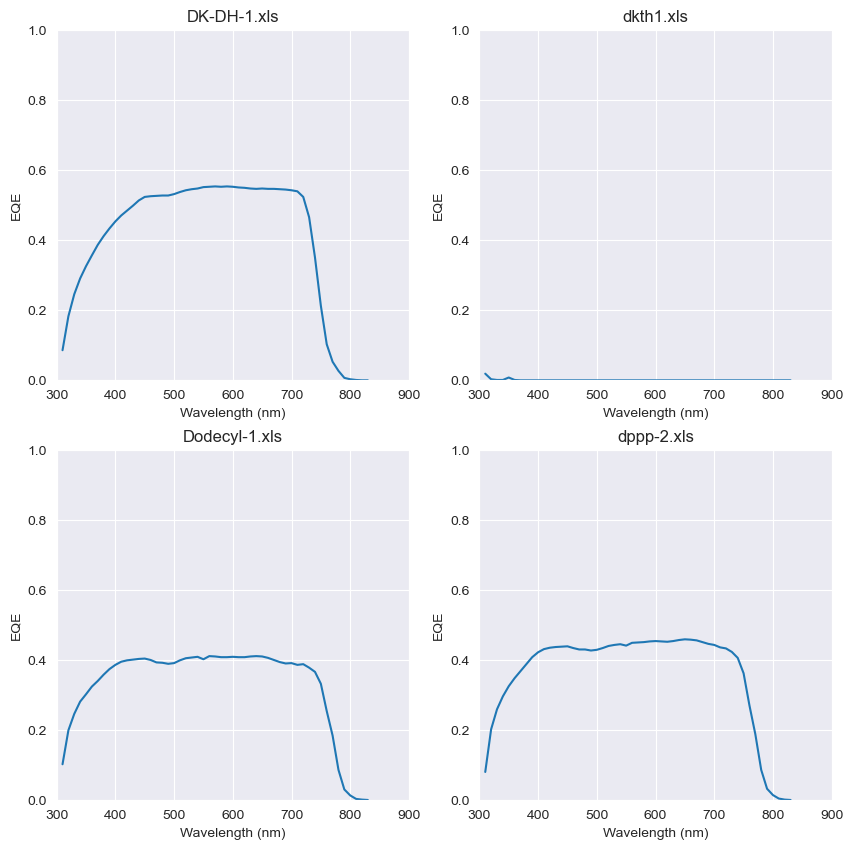

In [22]:
#get the path of the files in the folder EQE/eqe - 1
import glob
files = glob.glob('EQE\eqe - 1\*.xls')
files

#make a function that splits the path of the file and returns the last part of the path
def get_filename(path):
    return path.split('\\')[-1]

#make a list of dataframes
#read the excel files in the folder EQE/eqe - 1
#drop the lines 0 and 1
#rename the column names with "wavelength" and "EQE"
#append the dataframes to the list
df_list = []
sample_name = []
for file in files:
    df = pd.read_excel(file, sheet_name=0, skiprows=[0,1])
    col_name = list(df.columns)
    df = df.rename(columns={col_name[0]:'wavelength', col_name[1]:'EQE'})
    sample_name.append(get_filename(file))
    df_list.append(df)

#make a grid of plots with 2 rows and 2 columns
#plot the data
#plot the column 'Wavelength' as x and 'EQE' as y
#label the x and y axis
#show the plot
#use the library seaborn to plot the data
fig, axes = plt.subplots(2, 2, figsize=(10, 10))
for i, ax in enumerate(axes.flatten()):
    sns.lineplot(x='wavelength', y='EQE', data=df_list[i], ax=ax)
    ax.set_xlabel('Wavelength (nm)')
    ax.set_ylabel('EQE')
    ax.set_xlim(300, 900)
    ax.set_ylim(0, 1)
    ax.set_title(sample_name[i])
    #add a grid to the plot
    ax.grid(True)

